# IMPORT LIBRARY

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.cifar100.load_data()

# Cek Jumlah Data Train dan Test

In [3]:
print(f'panjang x train: {len(x_train_raw)}',
      f'panjang y train: {len(y_train_raw)}',
      f'panjang x test: {len(x_test_raw)}',
      f'panjang y test: {len(y_test_raw)}',
      sep='\n')

panjang x train: 50000
panjang y train: 50000
panjang x test: 10000
panjang y test: 10000


# Menampilkan Sampel Gambar

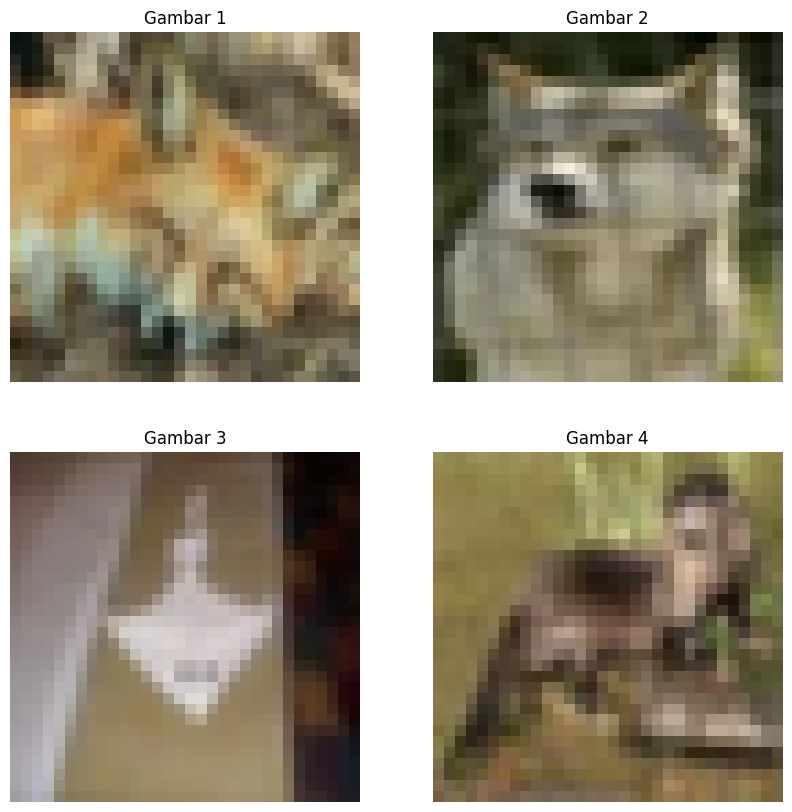

In [4]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 2, 1)

plt.imshow(x_train_raw[38174])
plt.axis('off')
plt.title("Gambar 1")

fig.add_subplot(2, 2, 2)

plt.imshow(x_train_raw[8162])
plt.axis('off')
plt.title("Gambar 2")

fig.add_subplot(2, 2, 3)

plt.imshow(x_train_raw[41721])
plt.axis('off')
plt.title("Gambar 3")

fig.add_subplot(2, 2, 4)

plt.imshow(x_train_raw[100])
plt.axis('off')
plt.title("Gambar 4")

plt.show()

# Encode Label

In [5]:
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

# Cek Dimensi Data Train

In [6]:
x_train_raw.shape

(50000, 32, 32, 3)

# Ubah Dimensi Array Image Menjadi 1D

In [7]:
x_train = tf.reshape(x_train_raw, [50000, 3072])
x_test = tf.reshape(x_test_raw, [10000, 3072])

# Menormalkan Nilai Piksel Gambar

In [8]:
x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255

# Bangun Arsitektur Modeling

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=3072),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='gelu'),
    tf.keras.layers.Dense(256, activation='swish'),
    tf.keras.layers.Dense(256, activation='hard_sigmoid'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])
# Ringkasan detail parameter layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 100)               25700     
                                                                 
Total params: 649,444
Trainable params: 649,444
Non-trai

# Konfigurasi Model

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

# Latih Model

In [11]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    steps_per_epoch=15,
    validation_data=(x_test, y_test)
)

Epoch 1/30
15/15 [==============================] - 3s 191ms/step - loss: 4.5802 - accuracy: 0.0182 - val_loss: 4.4298 - val_accuracy: 0.0277
Epoch 2/30
15/15 [==============================] - 3s 188ms/step - loss: 4.2860 - accuracy: 0.0520 - val_loss: 4.1502 - val_accuracy: 0.0737
Epoch 3/30
15/15 [==============================] - 2s 160ms/step - loss: 4.0849 - accuracy: 0.0822 - val_loss: 4.0113 - val_accuracy: 0.0918
Epoch 4/30
15/15 [==============================] - 2s 155ms/step - loss: 3.9648 - accuracy: 0.0963 - val_loss: 3.9302 - val_accuracy: 0.1007
Epoch 5/30
15/15 [==============================] - 2s 167ms/step - loss: 3.8606 - accuracy: 0.1122 - val_loss: 3.8229 - val_accuracy: 0.1217
Epoch 6/30
15/15 [==============================] - 2s 163ms/step - loss: 3.7681 - accuracy: 0.1266 - val_loss: 3.7806 - val_accuracy: 0.1212
Epoch 7/30
15/15 [==============================] - 2s 149ms/step - loss: 3.7040 - accuracy: 0.1351 - val_loss: 3.6971 - val_accuracy: 0.1342
Epoch 

# Grafik Learning Rate

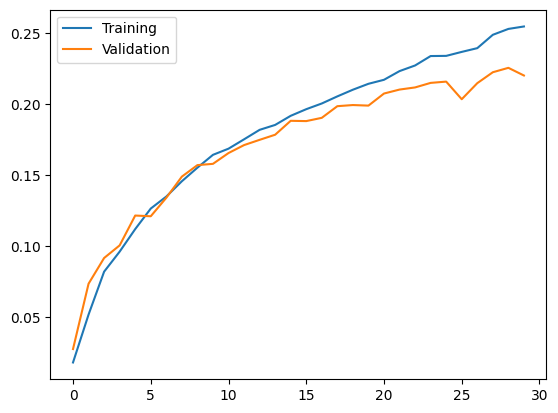

In [12]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()